# Analysis of Brent Oil Prices with Economic Indicators

In this notebook, we will analyze Brent oil prices in relation to various economic indicators using data from the World Bank. The focus will be on the top 10 countries influencing the oil market.

## Steps

1. **Data Retrieval**: We will fetch data for Brent oil prices and various economic indicators such as GDP, inflation rates, unemployment rates, and exchange rates.

2. **Data Analysis**: We will perform correlation analysis to understand how these indicators relate to oil prices.

3. **Modeling**: We will fit a VAR model to examine the relationships among the time series.

4. **Visualization**: Finally, we will visualize the results to gain insights.

## Importing Necessary Libraries

Let's start by importing the required libraries and our custom functions from `oil_analysis.py`.


In [1]:
# Import libraries
import pandas as pd
import datetime
import wbdata
import sys, os
import warnings
warnings.filterwarnings('ignore')

# Set Seaborn style for better aesthetics
import seaborn as sns
sns.set()


In [2]:
sys.path.append(os.path.abspath('../scripts'))

In [3]:
from oil_analysis import fetch_worldbank_data, preprocess_data, plot_correlation_matrix, \
                               vector_autoregression, markov_switching_model, plot_time_series


In [4]:
oil_data = pd.read_csv(r'C:\Users\Blen\OneDrive\Documents\10Academy\Week10\data\Copy of BrentOilPrices.csv', parse_dates=['Date'])

## Step 1: Data Retrieval

We will fetch data for the following countries and indicators:

- **Countries**: United States (USA), Saudi Arabia (SAU), Russia (RUS), China (CHN), Iraq (IRQ), Canada (CAN), UAE (ARE), Iran (IRN), Brazil (BRA), and Kuwait (KWT).
- **Indicators**: GDP, Inflation Rate, Unemployment Rate, Exchange Rate.

Let's define our countries and indicators and retrieve the data.


In [5]:
# Fetch data
try:
    world_bank_data = fetch_worldbank_data()
    display(world_bank_data.head())
except Exception as e:
    print(f"Error: {e}")


INFO:root:Fetching World Bank data...
INFO:root:Data fetched successfully.


,date,GDP,Inflation,Unemployment,Exchange Rate
0,2022,1.012251e+14,7.967574,5.264616,None
1,2021,9.752703e+13,3.466926,6.033761,None
2,2020,8.557772e+13,1.920968,6.585288,None
3,2019,8.794557e+13,2.206073,5.582980,None
4,2018,8.668687e+13,2.450362,5.756398,None


---

## Step 3: Data Preprocessing

Next, we merge the economic indicators data with the Brent oil price data and apply normalization.


In [6]:
oil_data['year'] = oil_data['Date'].dt.year

In [7]:
world_bank_data = world_bank_data.rename(columns={'date': 'year'})
world_bank_data['year'] = pd.to_numeric(world_bank_data['year']) 

In [8]:
# Preprocess and merge data
merged_data = preprocess_data(world_bank_data, oil_data)

# Display the first few rows of the merged data
merged_data.head()


,year,GDP,Inflation,Unemployment,Exchange Rate,Date,Price
0,2022,1.012251e+14,7.967574,5.264616,None,2022-01-03,78.25
1,2022,1.012251e+14,7.967574,5.264616,None,2022-01-04,79.39
2,2022,1.012251e+14,7.967574,5.264616,None,2022-01-05,80.60
3,2022,1.012251e+14,7.967574,5.264616,None,2022-01-06,81.99
4,2022,1.012251e+14,7.967574,5.264616,None,2022-01-07,82.28


---

## Step 4: Exploratory Data Analysis (EDA)

Let's perform a basic exploratory analysis to understand the correlation between oil prices and various economic indicators.


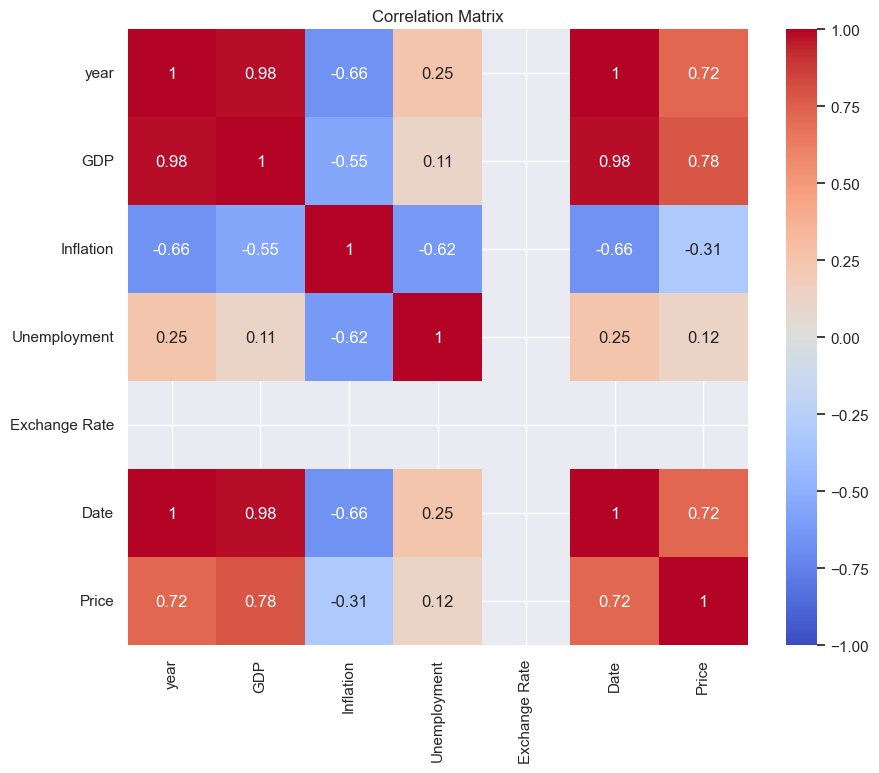

In [9]:
# Plot correlation matrix
plot_correlation_matrix(merged_data)

### Interpretation of Correlation Matrix
This correlation matrix reveals the relationships between oil prices and key economic indicators, helping us understand which factors may be more influential on oil prices.

#### From the Correlation Analysis:
##### GDP has a strong and positive correlation
##### unemployment has a moderate but positive correlation
##### Inflation rate has a negative correlation

---

## Step 5: Time Series Analysis

We will apply the following time series models:
1. **Vector Autoregression (VAR)**: To explore the influence of multiple indicators on oil prices.
2. **Markov-Switching Model**: To analyze regime changes in oil price trends.


In [10]:
merged_data.info()

<class 'wbdata.client.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   year           9011 non-null   int64         
 1   GDP            9011 non-null   float64       
 2   Inflation      9011 non-null   float64       
 3   Unemployment   8086 non-null   float64       
 4   Exchange Rate  0 non-null      object        
 5   Date           9011 non-null   datetime64[ns]
 6   Price          9011 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 492.9+ KB


In [11]:
merged_data = merged_data.dropna(subset=['Unemployment'])

In [12]:
# Vector Autoregression Model
var_model = vector_autoregression(merged_data[['Price', 'GDP', 'Inflation', 'Unemployment']])

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 05, Nov, 2024
Time:                     21:46:07
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    40.9534
Nobs:                     8085.00    HQIC:                   40.9420
Log likelihood:          -211353.    FPE:                6.00239e+17
AIC:                      40.9361    Det(Omega_mle):     5.98756e+17
--------------------------------------------------------------------
Results for equation Price
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                  -0.000633         0.544274           -0.001           0.999
L1.Price                0.996099         0.001102          904.137           0.000
L1.GDP                  0.000000         0.000000   

### Interpreting VAR Results
The VAR model allows us to assess how changes in GDP, inflation, unemployment, and exchange rates impact Brent oil prices over time.


In [13]:
# Markov-Switching Model
ms_model = markov_switching_model(merged_data['Price'])

                        Markov Switching Model Results                        
Dep. Variable:                  Price   No. Observations:                 8086
Model:               MarkovRegression   Log Likelihood              -32443.727
Date:                Tue, 05 Nov 2024   AIC                          64899.455
Time:                        21:46:10   BIC                          64941.442
Sample:                             0   HQIC                         64913.819
                               - 8086                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.9671      0.099    211.469      0.000      20.773      21.161
sigma2        32.3201      0.814     39.701      0.0

### Interpreting Markov-Switching Results
The Markov-Switching model captures different "regimes" in oil price trends, highlighting periods of volatility and stability.

---

## Step 6: Additional Analysis

### Examining Individual Time Series Plots
We will plot the time series of each indicator and the Brent oil price to visually inspect trends and potential patterns.


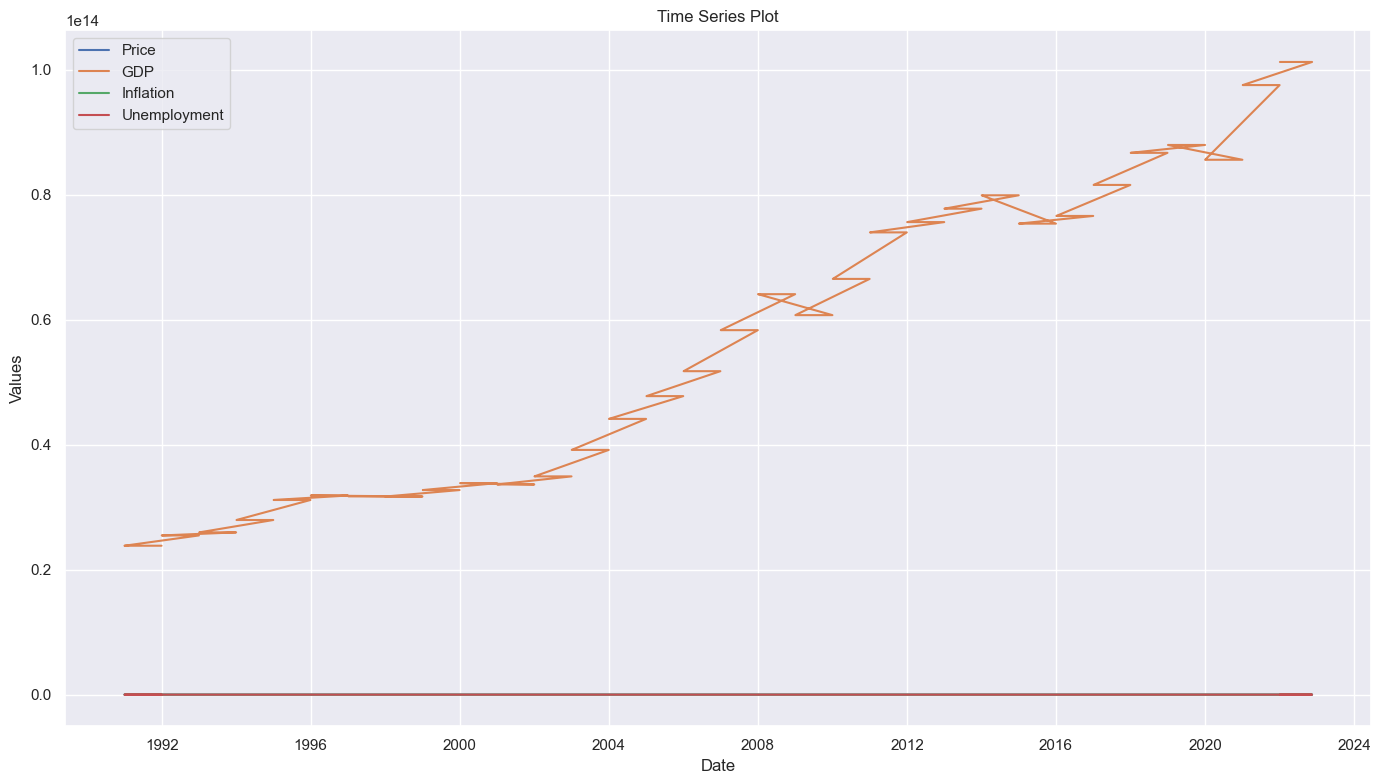

In [14]:
# Plot time series of all indicators
plot_time_series(merged_data, ['Price', 'GDP', 'Inflation', 'Unemployment'])


In [15]:
merged_data = merged_data.drop("Exchange Rate", axis=1)

In [16]:
merged_data.head()

,year,GDP,Inflation,Unemployment,Date,Price
0,2022,1.012251e+14,7.967574,5.264616,2022-01-03,78.25
1,2022,1.012251e+14,7.967574,5.264616,2022-01-04,79.39
2,2022,1.012251e+14,7.967574,5.264616,2022-01-05,80.60
3,2022,1.012251e+14,7.967574,5.264616,2022-01-06,81.99
4,2022,1.012251e+14,7.967574,5.264616,2022-01-07,82.28


In [17]:
merged_data.to_csv("additional_economic_indicators.csv")